In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
medical_examination = pd.read_csv("G:\Otros ordenadores\Mi Portátil\Gaspar\Analisis de datos\Free code camp\Medical Data Visualizer\medical_examination.csv")

medical_examination

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**Determination of overweight in patients**

In [3]:
# Addition of a column "overweight."

medical_examination["overweigh"] = None

In [4]:
IMC = medical_examination["weight"] / (medical_examination["height"] / 100) **2

In [5]:
#If the value is 0, the patient does not have overweight
#If the value is 1, the patient has overweight

def convert(IMC):
    if IMC > 25:
        return "1"
    else:
        return "0"

overweight = IMC.map(convert)

overweight

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Length: 70000, dtype: object

In [6]:
medical_examination["overweigh"] = overweight

medical_examination

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweigh
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [7]:
# Normalization of data
# Whenever the value for cholesterol or glucose is 0, it means it is good; if it is 1, it means it is bad

cholesterol = medical_examination['cholesterol']

gluc = medical_examination['gluc']

In [8]:
def convert2(data):
    if data == 1:
        return "0"
    else:
        return "1"

normalized_cholesterol = cholesterol.map(convert2)

normalized_gluc = gluc.map(convert2) 

In [9]:
normalized_cholesterol

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: object

In [10]:
normalized_gluc

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: object

In [11]:
medical_examination["cholesterol"] = normalized_cholesterol

medical_examination["gluc"] = normalized_gluc

medical_examination

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweigh
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


**Conversion of data to long format**

In [22]:
medical_examination_long_format = pd.melt(medical_examination,
                                          id_vars=["id",
                                                   "age",
                                                   "sex",
                                                   "weight",
                                                   "height",
                                                   "cardio",
                                                   "ap_hi",
                                                   "ap_lo"],
                                          var_name= "characteristics",
                                          value_name= "value")

medical_examination_long_format

,id,age,sex,weight,height,cardio,ap_hi,ap_lo,characteristics,value
0,0,18393,2,62.0,168,0,110,80,cholesterol,0
1,1,20228,1,85.0,156,1,140,90,cholesterol,1
2,2,18857,1,64.0,165,1,130,70,cholesterol,1
3,3,17623,2,82.0,169,1,150,100,cholesterol,0
4,4,17474,1,56.0,156,0,100,60,cholesterol,0
...,...,...,...,...,...,...,...,...,...,...
419995,99993,19240,2,76.0,168,0,120,80,overweigh,1
419996,99995,22601,1,126.0,158,1,140,90,overweigh,1
419997,99996,19066,2,105.0,183,1,180,90,overweigh,1
419998,99998,22431,1,72.0,163,1,135,80,overweigh,1


In [44]:
medical_examination_long_format['value'] = pd.to_numeric(medical_examination_long_format['value'])

**Bar chart of categorical feature counts**

In [14]:
import seaborn as sns

C:\Users\gaspa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


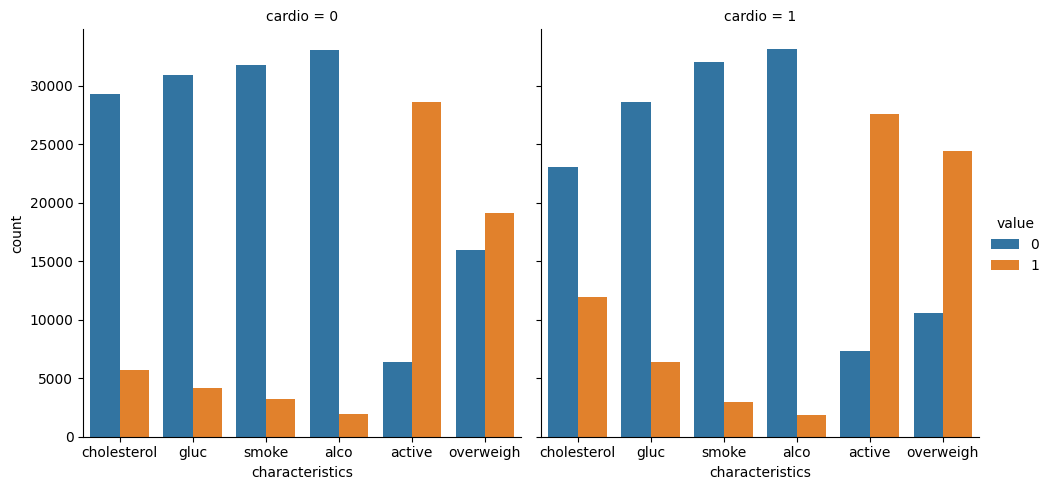

In [45]:
sns.catplot(x = "characteristics",  data = medical_examination_long_format,
            kind = "count", hue = "value", col = "cardio")

plt.show()

**Cleaning of erroneous data**

In [71]:
# The height cannot be lower than the 2.5th percentile or higher than the 97.5th percentile
# Removal of erroneous elements

medical_examination = medical_examination[medical_examination['height'] >= medical_examination['height'].quantile(0.025)]

medical_examination = medical_examination[medical_examination['height'] <= medical_examination['height'].quantile(0.975)]

In [72]:
# The diastolic pressure cannot be higher than the systolic pressure

medical_examination = medical_examination[medical_examination["ap_lo"] <= medical_examination["ap_lo"]]

In [74]:
# The weight cannot be lower than the 2.5th quartile or higher than the 97.5th quartile

medical_examination = medical_examination[medical_examination['weight'] >= medical_examination['weight'].quantile(0.025)]

medical_examination = medical_examination[medical_examination['weight'] <= medical_examination['weight'].quantile(0.975)]

In [76]:
medical_examination

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweigh
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


**Correlation matrix**

In [85]:
# Change of data type to numeric

medical_examination["cholesterol"] = pd.to_numeric(medical_examination['cholesterol'], errors = "coerce")

medical_examination["gluc"] = pd.to_numeric(medical_examination['gluc'], errors = "coerce")

medical_examination["overweigh"] = pd.to_numeric(medical_examination['overweigh'], errors = "coerce")

In [84]:
medical_examination.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61210 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           61210 non-null  int64  
 1   age          61210 non-null  int64  
 2   sex          61210 non-null  int64  
 3   height       61210 non-null  int64  
 4   weight       61210 non-null  float64
 5   ap_hi        61210 non-null  int64  
 6   ap_lo        61210 non-null  int64  
 7   cholesterol  61210 non-null  int64  
 8   gluc         61210 non-null  int64  
 9   smoke        61210 non-null  int64  
 10  alco         61210 non-null  int64  
 11  active       61210 non-null  int64  
 12  cardio       61210 non-null  int64  
 13  overweigh    61210 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.0 MB


In [89]:
# Creation of the correlation matrix
medical_examinationi_corr = medical_examination.corr()

medical_examinationi_corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweigh
id,1.000000,0.002214,0.005715,0.002214,0.001777,0.003215,0.000846,0.005130,0.003008,-0.000893,-0.000492,0.005067,0.003646,0.000468
age,0.002214,1.000000,-0.011473,-0.071663,0.072783,0.020997,0.021624,0.128066,0.088312,-0.040047,-0.027331,-0.011751,0.237465,0.088005
sex,0.005715,-0.011473,1.000000,0.489019,0.113735,0.003684,0.012064,-0.034374,-0.020183,0.336873,0.167592,0.009114,0.006585,-0.045636
height,0.002214,-0.071663,0.489019,1.000000,0.228514,0.001838,-0.001890,-0.060790,-0.032225,0.180765,0.082899,-0.000917,-0.020556,-0.137252
weight,0.001777,0.072783,0.113735,0.228514,1.000000,0.028462,0.039736,0.137399,0.104950,0.049650,0.055724,-0.010084,0.171957,0.670955
ap_hi,0.003215,0.020997,0.003684,0.001838,0.028462,1.000000,0.015785,0.025230,0.012382,-0.001275,0.000835,-0.000466,0.052318,0.020341
ap_lo,0.000846,0.021624,0.012064,-0.001890,0.039736,0.015785,1.000000,0.027356,0.012952,0.005402,0.013959,0.006295,0.067564,0.030663
cholesterol,0.005130,0.128066,-0.034374,-0.060790,0.137399,0.025230,0.027356,1.000000,0.385157,0.013978,0.038791,0.002988,0.202393,0.127084
gluc,0.003008,0.088312,-0.020183,-0.032225,0.104950,0.012382,0.012952,0.385157,1.000000,-0.004107,0.013555,-0.008427,0.088137,0.086373
smoke,-0.000893,-0.040047,0.336873,0.180765,0.049650,-0.001275,0.005402,0.013978,-0.004107,1.000000,0.339950,0.027069,-0.018941,0.000317


In [98]:
# Creation of a mask to generate the correlation plot

mask = np.triu(np.ones_like(medical_examinationi_corr, dtype = bool))

<Axes: >

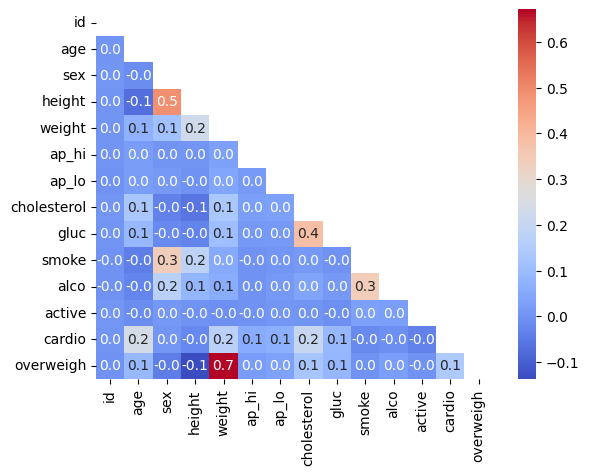

In [102]:
sns.heatmap(data = medical_examinationi_corr,
            annot = True, fmt = '.1f',
            mask = mask,
            cmap = 'coolwarm'
           )